#  Logistic regression using scikit-learn : diabetes dataset

## Import necessary libraries

In [194]:
import numpy
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')

hourly_wages.csv
pima-indians-diabetes-data.csv



## Load and Explore data

Data Description : https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [195]:
data_loc = "data/pima-indians-diabetes-data.csv"
data = pd.read_csv(data_loc)

In [196]:
data.head()
# data.head(10)

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [197]:
data.describe(include='all')

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [198]:
data.dtypes

num_pregnant        int64
plasma_glucose      int64
blood_pressure      int64
skin_thickness      int64
insulin             int64
bmi               float64
pedigree          float64
age                 int64
diabetes            int64
dtype: object

In [199]:
data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

## Basic Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce49f28>,
      dtype=object)

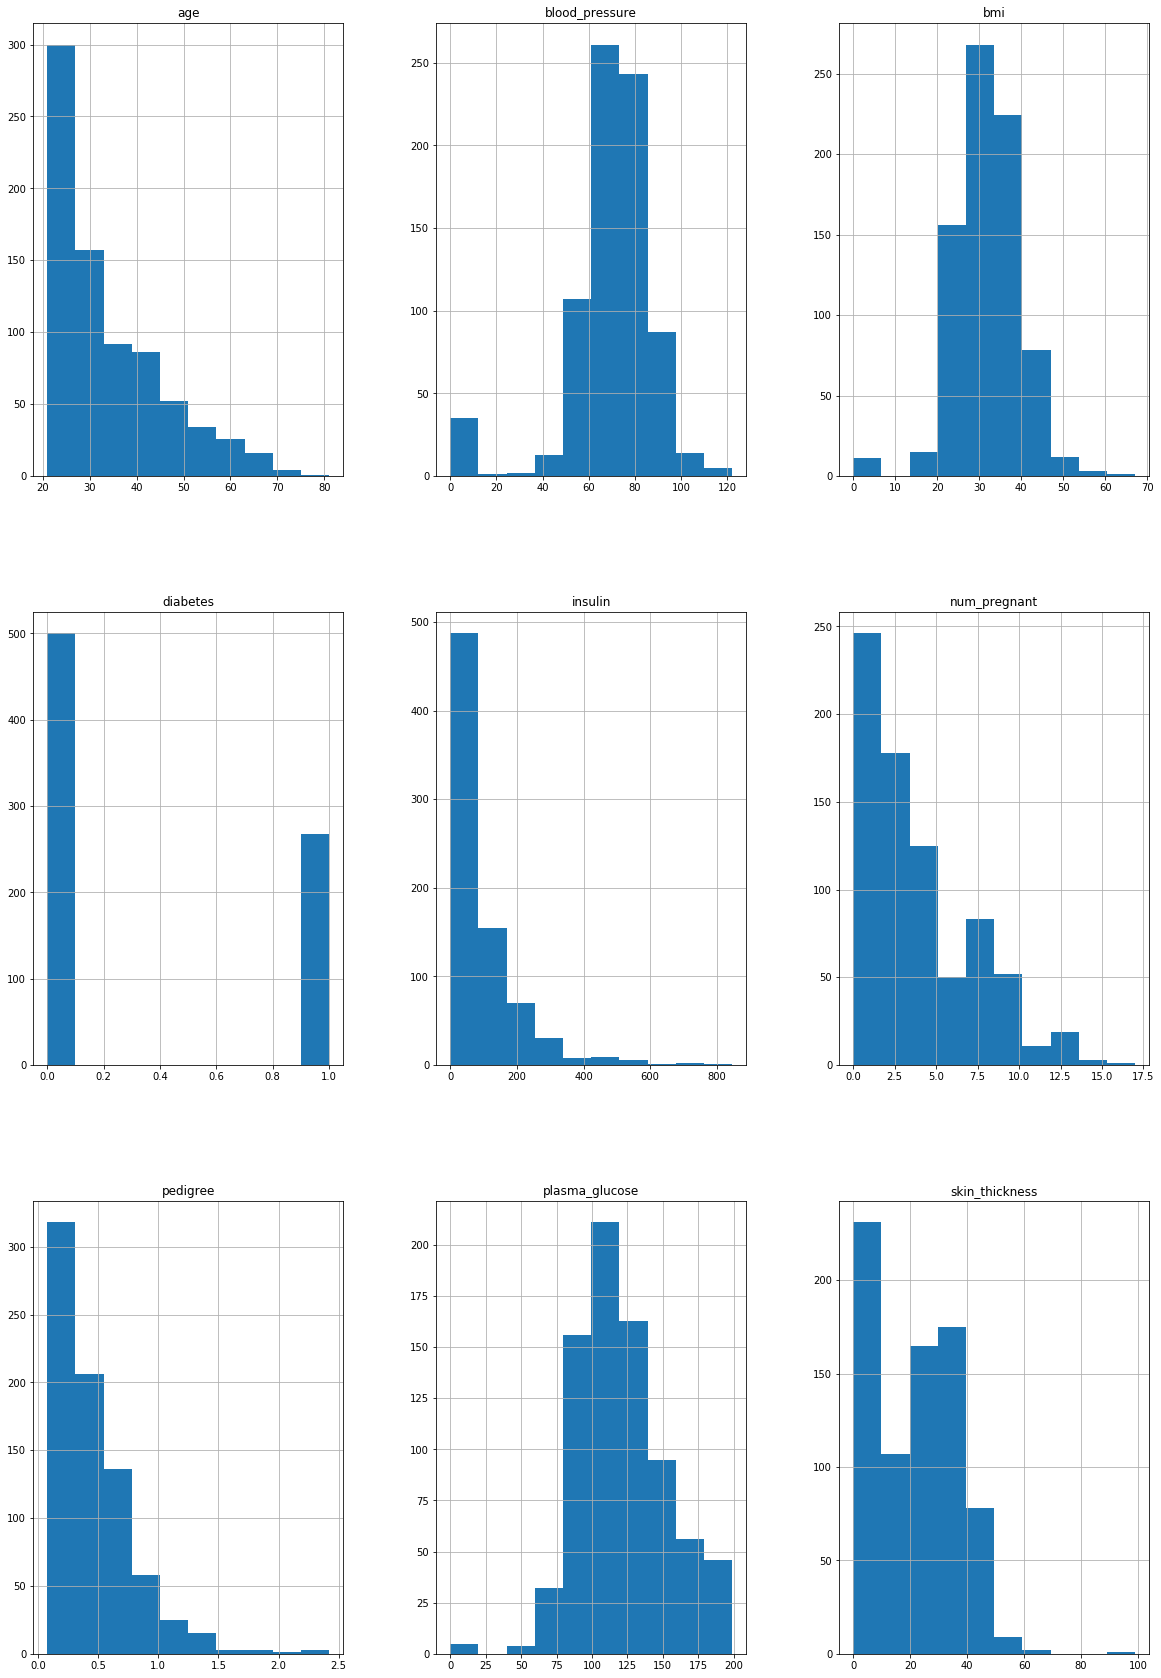

In [200]:
data.hist(figsize=(20,30))

Attributes BMI, BloodPressure, Glucose are found to be normally distributed. BMI and BloodPressure nearly have Gaussian distribution. Age, DiabetesPedigreeFunction, Insulin, Pregnancies found to be exponentially distributed

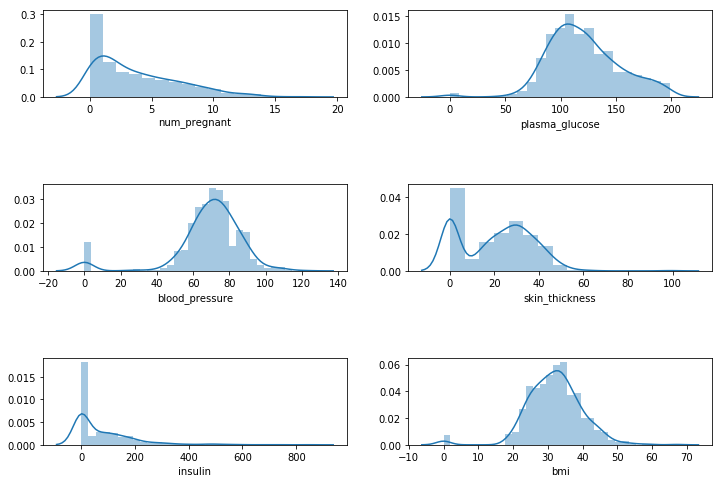

In [201]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 8))

sns.distplot(data['num_pregnant'],ax=axarr[0][0])
sns.distplot(data['plasma_glucose'],ax=axarr[0][1])
sns.distplot(data['blood_pressure'],ax=axarr[1][0])
sns.distplot(data['skin_thickness'],ax=axarr[1][1])
sns.distplot(data['insulin'],ax=axarr[2][0])
sns.distplot(data['bmi'],ax=axarr[2][1])

plt.subplots_adjust(hspace=1)

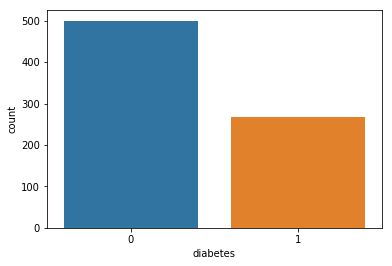

In [202]:
sns.countplot(data['diabetes'])

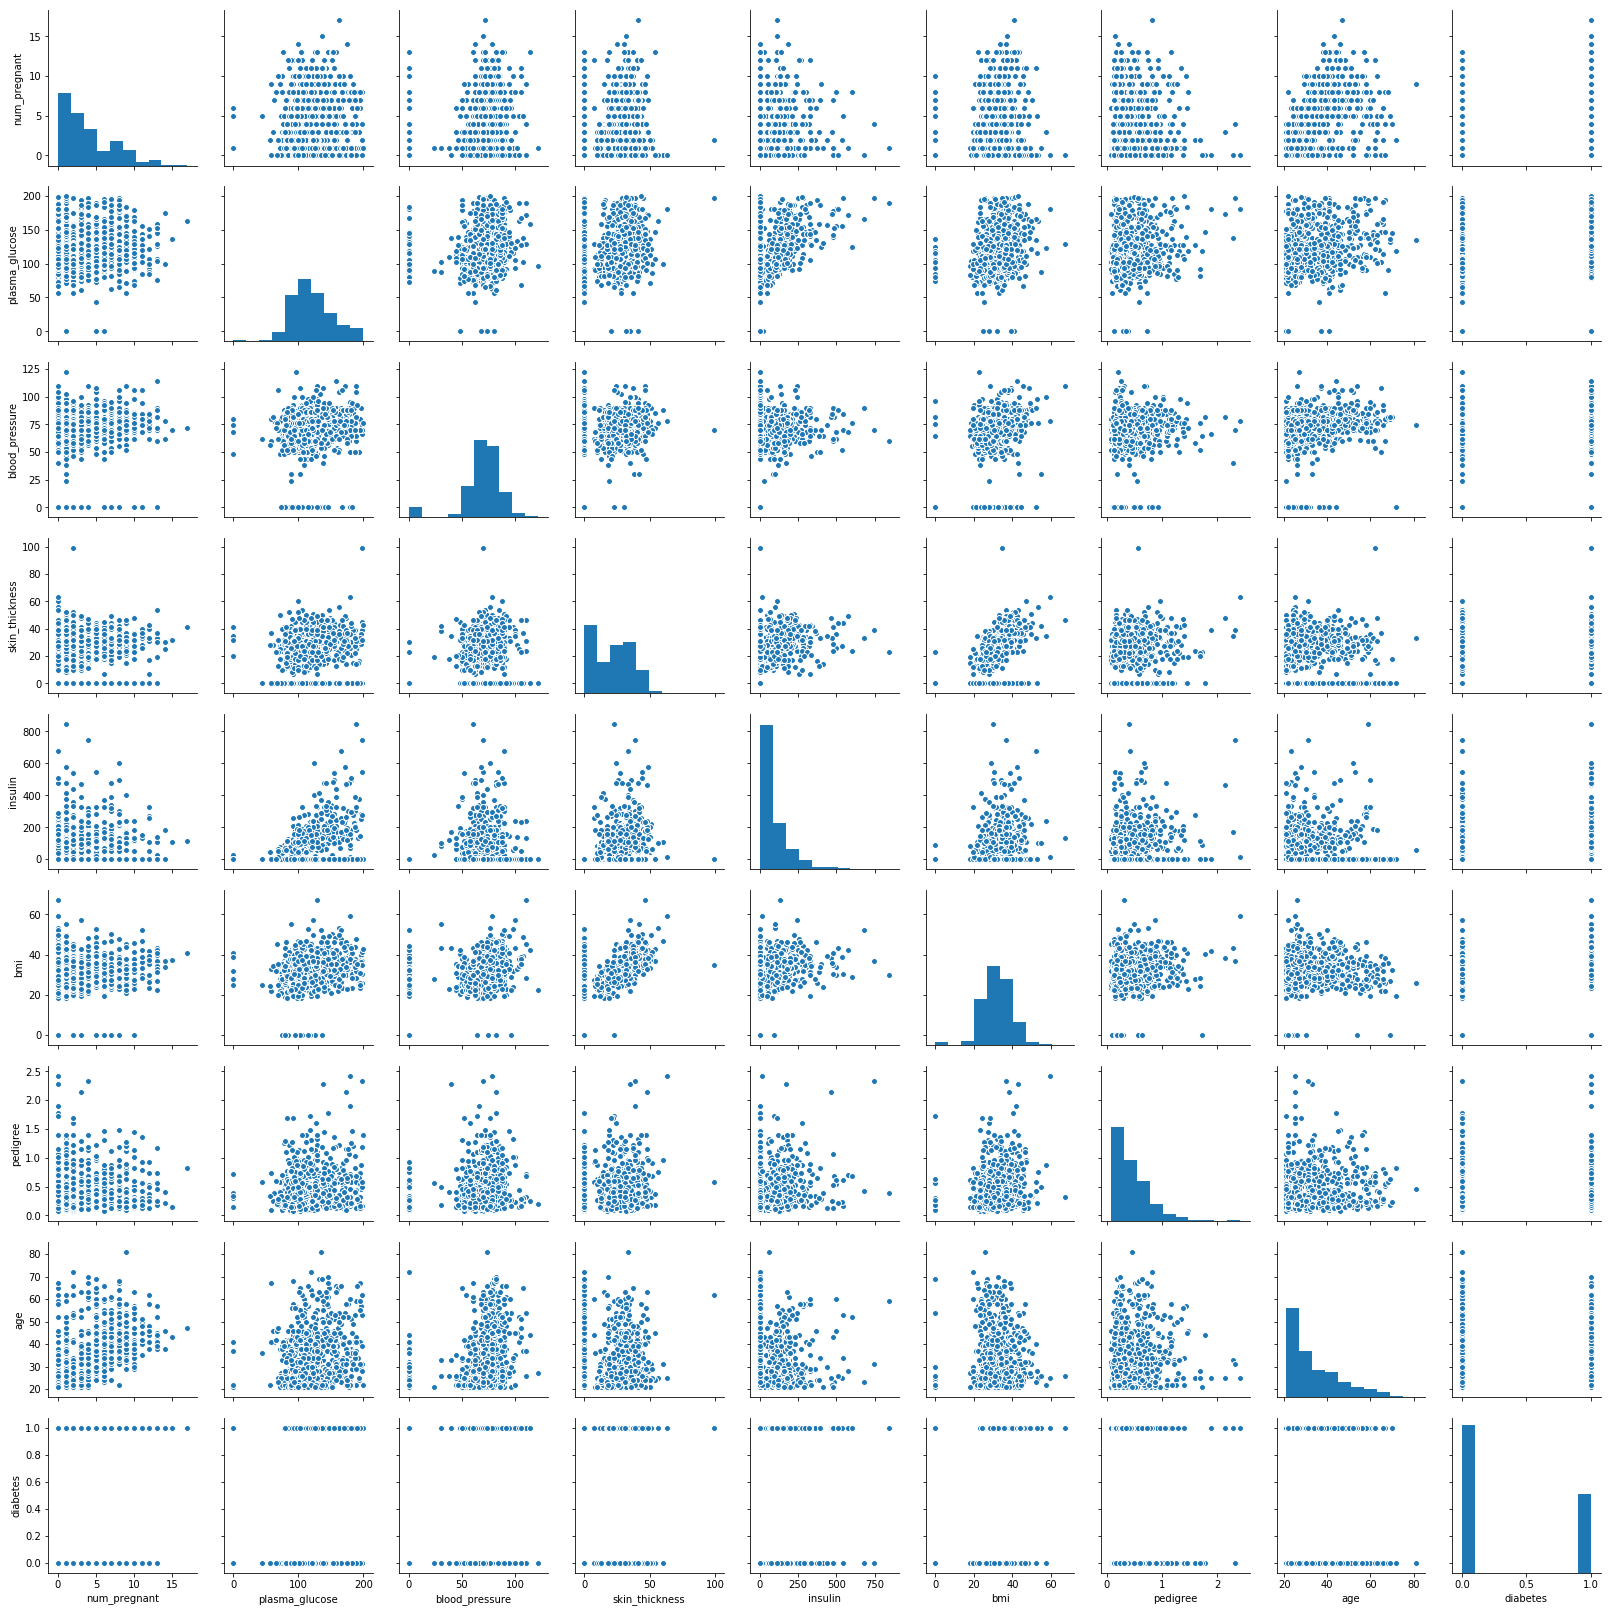

In [203]:
# data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
sns.pairplot(data)

In [204]:
corr = data.corr()
corr

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
num_pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma_glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


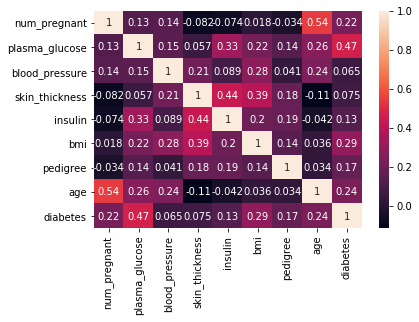

In [205]:
sns.heatmap(corr, annot = True)

Observed that attributes BloodPressure, SkinThickness are not much related to outcome.

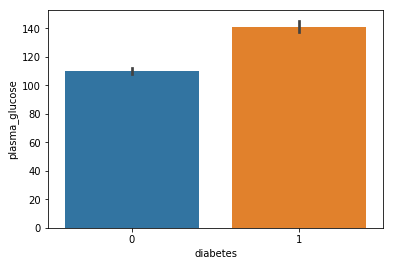

In [206]:
sns.barplot(data['diabetes'], data['plasma_glucose'])

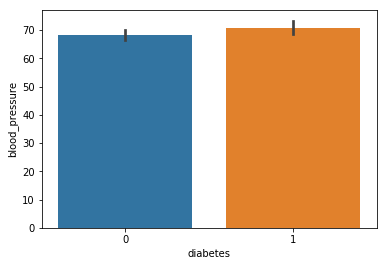

In [207]:
sns.barplot(data['diabetes'], data['blood_pressure'])

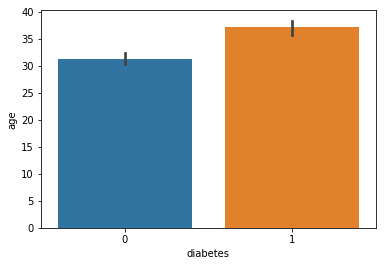

In [208]:
sns.barplot(data['diabetes'], data['age'])

## Missing value treatment

The following columns have an invalid zero minimum value:

* Plasma glucose concentration
* Diastolic blood pressure
* Triceps skinfold thickness
* 2-Hour serum insulin
* Body mass index

In [209]:
# Lets cross check
data.head(20)

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [210]:
# Read the data with out headers
data = pd.read_csv("data/pima-indians-diabetes-data.csv", header=None, skiprows=1)
print((data[[1,2,3,4,5]] == 0.0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [211]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [212]:
# Mark zero values as missing or NaN
data[[1,2,3,4,5]] = data[[1,2,3,4,5]].replace(0, np.NaN)
# Count the number of NaN values in each column
print(data.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [213]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [214]:
# Impute the values

In [215]:
# Fill missing values with mean column values
data.fillna(data.mean(), inplace=True)
# Count the number of NaN values in each column
print(data.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [220]:
data.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


## Train and test split

In [221]:
X = data.drop(columns=[8])
# X

In [222]:
Y = data[8]
# Y

In [223]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25, random_state=42)

## Build a simple model

In [224]:
lr = LogisticRegression()

In [225]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [226]:
print(f"Training score : {lr.score(trainX,trainY) * 100}")
print(f"Testing score : {lr.score(testX,testY) * 100}")

Training score : 76.73611111111111
Testing score : 76.04166666666666


In [227]:
from sklearn.metrics import classification_report,confusion_matrix

In [228]:
test_pred = lr.predict(testX)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [229]:
print(classification_report(testY, test_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       123
           1       0.69      0.59      0.64        69

   micro avg       0.76      0.76      0.76       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.76      0.76       192



In [230]:
cm = confusion_matrix(testY, test_pred)
print(cm)

[[105  18]
 [ 28  41]]


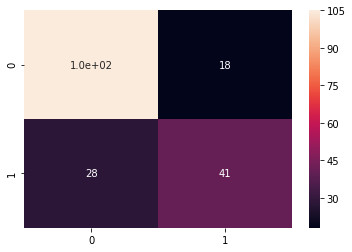

In [231]:
label = ["0","1"]
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)

## Cross Validation

In [232]:
# You will need the following dependencies for applying Cross-validation and evaluating the cross-validated score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [233]:
# Build the k-fold cross-validator

kfold = KFold(n_splits=3, random_state=7)

In [234]:
result = cross_val_score(lr, X, Y, cv=kfold, scoring='accuracy')
print(result.mean())

0.7526041666666666


## Hyper parameter Tuning

### Grid Search

In [235]:
from sklearn.model_selection import GridSearchCV

In [236]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, Y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.764323 using {'C': 2.0, 'dual': False, 'max_iter': 100}
Execution time: 2.3639800548553467 ms


In [237]:
print(grid.best_estimator_.score(trainX, trainY))
print(grid.best_estimator_.score(testX, testY))

0.7708333333333334
0.75


### Random Search

In [238]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(trainX, trainY)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.762153 using {'max_iter': 110, 'dual': False, 'C': 2.5}
Execution time: 0.1882491111755371 ms


In [239]:
print(grid.best_estimator_.score(trainX, trainY))
print(grid.best_estimator_.score(testX, testY))

0.7708333333333334
0.75


## Save and Load the model / Prediction

In [240]:
import pickle

In [241]:
Xnew = [[3, 78.0, 50.000000, 32.0000, 88.000000, 31.000000, 0.248,26]]
ynew = grid.best_estimator_.predict(Xnew)
ynew

array([0])

In [242]:
# save the model to disk
filename = 'logr_model'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [243]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [244]:
ynew = loaded_model.predict(Xnew)
ynew

array([0])